In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# energygenerationdata = pd.read_csv("data/time_series_60min_singleindex.csv",
#                         usecols=(lambda s: s.startswith('utc') | 
#                                  s.startswith('DE_solar') |
#                                  s. startswith('DE_wind')),
#                         parse_dates=[0], index_col=0)

windgenerationdata = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('DE_wind_generation')),
                        parse_dates=[0], index_col=0)

# solargenerationdata = pd.read_csv("data/time_series_60min_singleindex.csv",
#                         usecols=(lambda s: s.startswith('utc') | 
#                                  s.startswith('DE_solar')),
#                         parse_dates=[0], index_col=0)

In [3]:
# weatherdata = pd.read_csv("data/weather_data.csv",
#                 usecols=(lambda s: s.startswith('utc') | 
#                          s.startswith('DE')),
#                 parse_dates=[0], index_col=0)

In [4]:
windspeed = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('DE_windspeed')),
                parse_dates=[0], index_col=0)

In [5]:
# windspeed

In [6]:
#creating training data but cutting the data based on time stamp
start_remove = pd.to_datetime('2016-01-01')
end_remove = pd.to_datetime('2017-01-01')
windspeedformatted = windspeed.loc[(windspeed.index >= start_remove)]
windgenerationdataformatted = windgenerationdata.loc[(windgenerationdata.index >= start_remove) & (windgenerationdata.index < end_remove)]

TypeError: Cannot compare tz-naive and tz-aware datetime-like objects

In [7]:
#creating test/comparison data
start_test = pd.to_datetime('2015-01-01')
end_test = pd.to_datetime('2016-01-01')
windspeedtest = windspeed.loc[(windspeed.index >= start_test) & (windspeed.index < end_test)]
windgenerationtest = windgenerationdata.loc[(windgenerationdata.index >= start_test) & (windgenerationdata.index < end_test)]

TypeError: Cannot compare tz-naive and tz-aware datetime-like objects

In [8]:
# windspeedformatted

In [9]:
# windgenerationdataformatted

In [10]:
# max(windgenerationdataformatted['DE_wind_generation_actual'])

In [11]:
# min(windgenerationdataformatted['DE_wind_generation_actual'])

In [12]:
windgenerationdataformatted = windgenerationdataformatted * 1e-3

NameError: name 'windgenerationdataformatted' is not defined

In [13]:
windgenerationtest = windgenerationtest * 1e-3

NameError: name 'windgenerationtest' is not defined

In [14]:
# windgenerationtest

In [15]:
from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split

In [16]:
#train test might not be valid for our case because we have timestamps in play
# xtr, xts, ytr, yts = train_test_split(windspeedformatted,windgenerationdataformatted, test_size = 0.33)

In [17]:
#inital model training attempt
# model = LinearRegression().fit(xtr,ytr)
# predicted = model.predict(windspeedformatted)

In [18]:
#attempt at cross validation
# from sklearn.model_selection import cross_val_score

# model = LinearRegression()

# scores_wind = cross_val_score(model, windspeedformatted, windgenerationdataformatted, cv=5)
# print(scores_wind, "\naverage =", np.mean(scores_wind))

In [19]:
#predict using train test split data
# predicted = model.predict(xts)

In [20]:
# predicted

In [21]:
#error when using model from cross validation
# predicted = model.predict(windspeedformatted)

In [22]:
#timeseries used as x axis when plotting predicted
# timeseries = pd.date_range('2016-01-01', '2016-12-31 23:00:00', freq='H')

In [23]:
# timeseries

In [24]:
# windgenerationdataformatted.plot(linewidth=0.5)

In [25]:
# I think this is an invalid test because using entire dataset in the predict but the training data is from that same set
# plt.plot(timeseries,predicted, linewidth=0.5)

In [26]:
'''
Todo:
take in weather data and generation data
separate data into two sets:
Solar
X = [sun related weather columns] 
Y = wind_generation_actual
Wind:
X = [wind related weather columns] 
Y = sun_generation_actual

Trim data based on timestamp
Wind generation begins at 2010-01-01
However there are values with NaN. Chose to only take 2016 for now
No wind data past 2016

Solar generation begins at 2012-01-01

To try: if there are timestamps do I have to format data?
'''
import sklearn.model_selection

nfold = 10
kf = sklearn.model_selection.KFold(n_splits = nfold, shuffle = True)

dtest = np.arange(0, 10)
nd = len(dtest)

RSSts = np.zeros((nd, nfold))

for isplit, Ind in enumerate(kf.split(windspeedformatted)):
    Itr, Its = Ind
    xtr = windspeedformatted[Itr]
    ytr = windgenerationdataformatted[Itr]
    xts = windspeedformatted[Its]
    yts = windgenerationdataformatted[Its]
    
    for it, d in enumerate(dtest):
        beta_hat = poly.polyfit(xtr, ytr, d)
        
        yhat = poly.polyval(xts, beta_hat)
        RSSts[it, isplit] = np.mean((yhat-yts) ** 2)

'\nTodo:\ntake in weather data and generation data\nseparate data into two sets:\nSolar\nX = [sun related weather columns] \nY = wind_generation_actual\nWind:\nX = [wind related weather columns] \nY = sun_generation_actual\n\nTrim data based on timestamp\nWind generation begins at 2010-01-01\nHowever there are values with NaN. Chose to only take 2016 for now\nNo wind data past 2016\n\nSolar generation begins at 2012-01-01\n\nTo try: if there are timestamps do I have to format data?\n'

In [27]:
model = LinearRegression().fit(windspeedformatted,windgenerationdataformatted)

In [28]:
#using the previously formatted data which is data from 2015
prediction = model.predict(windspeedtest)

In [29]:
timeseries = pd.date_range('2015-01-01', '2015-12-31 23:00:00', freq='H')

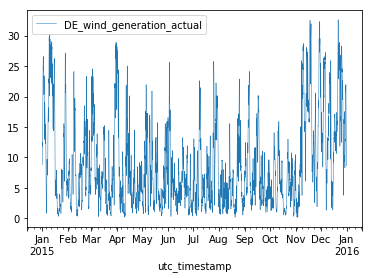

In [30]:
windgenerationtest.plot(linewidth=0.5)

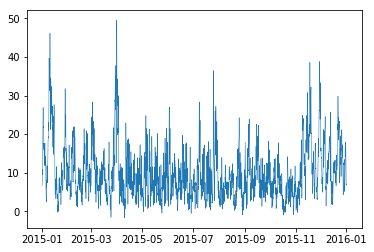

In [31]:
plt.plot(timeseries,prediction, linewidth=0.5)

In [32]:
from sklearn.metrics import r2_score
print(r2_score(windgenerationtest, prediction))

0.7393959896247211


In [33]:
#large number because we're deadling with large numbers
from sklearn.metrics import mean_squared_error
print(mean_squared_error(windgenerationtest, prediction))

13.351482541491038


In [34]:
print(np.sum((windgenerationtest-prediction)**2)/(prediction.shape[0]))

DE_wind_generation_actual    13.351483
dtype: float64


In [35]:
'''
To do:
Figure out mse (maybe normalize)
figure out cross validation fitting
Incorportate more data (more times and more regions)

NN model experimentation

Expand to solar generation
'''

'\nTo do:\nFigure out mse (maybe normalize)\nfigure out cross validation fitting\nIncorportate more data (more times and more regions)\n\nNN model experimentation\n\nExpand to solar generation\n'

In [36]:
#
def energy_production(energy):
    total_energy = np.sum(energy)
    avg_energy_per_hour = total_energy / energy.shape[0]
    avg_energy_per_day = total_energy / (energy.shape[0] / 24)
    print("Energy Data measured in Giga Watts")
    print("Total energy:", total_energy)
    print("Average Energy Per Hour:", avg_energy_per_hour)
    print("Average Energy Per Day:", avg_energy_per_day)

In [37]:
energy_production(windgenerationtest)

Total energy: DE_wind_generation_actual    77468.975
dtype: float64
Average Energy Per Hour: DE_wind_generation_actual    8.84349
dtype: float64
Average Energy Per Day: DE_wind_generation_actual    212.243767
dtype: float64


In [38]:
energy_production(prediction)

Total energy: 87293.07681968139
Average Energy Per Hour: 9.964963107269565
Average Energy Per Day: 239.15911457446956
